# Company Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("company_data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
df['Sales'] = pd.cut(x=df['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [7]:
df['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [8]:
# Converting other attributes into categories
df['CompPrice'] = pd.cut(x=df['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

df['Income'] = pd.cut(x=df['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

df['Advertising'] = pd.cut(x=df['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

df['Population'] = pd.cut(x=df['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

df['Price'] = pd.cut(x=df['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

df['Age'] = pd.cut(x=df['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

df['Education'] = pd.cut(x=df['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [9]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

df['Sales'] = label_encoder.fit_transform(df['Sales'])
df['CompPrice'] = label_encoder.fit_transform(df['CompPrice'])
df['Income'] = label_encoder.fit_transform(df['Income'])
df['Advertising'] = label_encoder.fit_transform(df['Advertising'])
df['Population'] = label_encoder.fit_transform(df['Population'])
df['Price'] = label_encoder.fit_transform(df['Price'])
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])

df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [10]:
# Dividing data into independent variables and dependent variable
X = df.drop('Sales', axis = 1)
y = df['Sales']


In [11]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [12]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [13]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [14]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,2,1,1,2,2,0,0,2,0,0
177,0,0,1,1,2,2,1,0,1,1
119,2,0,1,1,2,2,0,1,1,1
194,2,0,2,0,2,2,2,1,1,1
229,1,0,1,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,0,2,2,1,0,2,2,0,0,1
106,2,1,1,2,0,2,0,0,0,0
270,2,1,1,2,2,1,1,1,1,0
348,2,0,0,0,2,1,2,1,1,1


### Building model based on C5.0 Algorithm

In [15]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

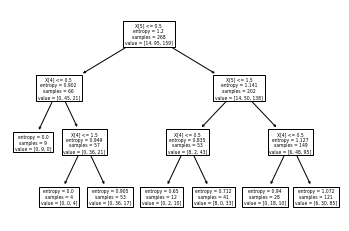

In [16]:
# Plotting Decision tree
tree.plot_tree(model_c5);

In [17]:
# Predicting Data
company_preds = model_c5.predict(x_test)
pd.Series(company_preds).value_counts()

2    94
1    38
dtype: int64

In [18]:
# Creating cross tables for checking model
pd.crosstab(y_test, company_preds)

col_0,1,2
Sales,,
0,0,13
1,22,13
2,16,68


In [19]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.6818181818181818

### Building model based on CART Algorithm

In [20]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

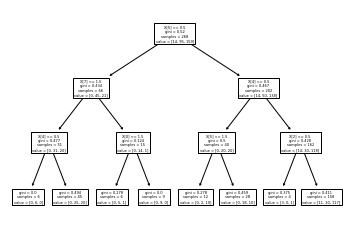

In [21]:
# Plotting Decision tree
tree.plot_tree(model_CART);

In [22]:
# Predicting Data
company_preds1 = model_CART.predict(x_test)
pd.Series(company_preds1).value_counts()

2    89
1    40
0     3
dtype: int64

In [23]:
company_preds1


array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2])

In [24]:
# Creating cross tables for checking model
pd.crosstab(y_test, company_preds1)

col_0,0,1,2
Sales,,,
0,0,0,13
1,1,22,12
2,2,18,64


In [25]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.6515151515151515